# Question 1

In [56]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import accuracy_score
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from sklearn import datasets
import random
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
import plotly.graph_objects as pg
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [58]:
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

In [59]:
print(test_data)

       Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0               0  19556  Female     Loyal Customer   52  Business travel   
1               1  90035  Female     Loyal Customer   36  Business travel   
2               2  12360    Male  disloyal Customer   20  Business travel   
3               3  77959    Male     Loyal Customer   44  Business travel   
4               4  36875  Female     Loyal Customer   49  Business travel   
...           ...    ...     ...                ...  ...              ...   
25971       25971  78463    Male  disloyal Customer   34  Business travel   
25972       25972  71167    Male     Loyal Customer   23  Business travel   
25973       25973  37675  Female     Loyal Customer   17  Personal Travel   
25974       25974  90086    Male     Loyal Customer   14  Business travel   
25975       25975  34799  Female     Loyal Customer   42  Personal Travel   

          Class  Flight Distance  Inflight wifi service  \
0           Eco 

In [60]:
print(train_data)

        Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi se

In [61]:
print(train_data.isna().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [62]:
train_data = train_data.dropna()

In [63]:
print(train_data.isna().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [64]:
print(train_data.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [65]:
train_data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,51950.102274,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,29997.914016,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25960.250000,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51955.500000,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77924.750000,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [66]:



train_data.describe(include = 'O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


In [67]:

train_data = train_data.drop(['Unnamed: 0','id'], axis = 'columns')
train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [68]:
le = LabelEncoder()
l_lst = ['Gender','Customer Type',	'Type of Travel',	'Class'	,'satisfaction']
for col in l_lst:
  train_data[col] = le.fit_transform(train_data[col])

In [69]:
train_data.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,0.492480,0.182752,39.380466,0.310143,0.593944,1189.325202,2.729753,3.060081,2.756984,2.977026,...,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.433394
std,0.499946,0.386465,15.113125,0.462554,0.620771,997.297235,1.327866,1.525233,1.398934,1.277723,...,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,842.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [70]:
ss = StandardScaler()
s_lst = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
train_data[s_lst] = ss.fit_transform(train_data[s_lst])

In [71]:

train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,-1.745542,1,2,-0.731305,3,4,3,1,...,5,4,3,4,4,5,5,0.268966,0.072905,0
1,1,1,-0.951526,0,0,-0.956916,3,2,3,3,...,1,1,5,3,1,4,1,-0.360682,-0.237184,0
2,0,0,-0.885358,0,0,-0.047454,2,2,2,2,...,5,4,3,4,4,4,5,-0.386917,-0.392229,1
3,0,0,-0.951526,0,0,-0.629028,2,5,5,5,...,2,2,5,3,1,4,2,-0.098328,-0.159662,0
4,1,0,1.430521,0,0,-0.977973,3,3,3,3,...,3,3,4,4,3,3,3,-0.386917,-0.392229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,-1.083862,0,1,-1.000033,2,1,2,3,...,2,3,1,4,2,3,2,-0.308211,-0.392229,0
103900,1,0,0.636505,0,0,1.160818,4,4,4,4,...,5,5,5,5,5,5,4,-0.386917,-0.392229,1
103901,1,1,-0.620686,0,0,0.807862,1,1,1,3,...,4,3,2,4,5,5,4,-0.203270,-0.030458,0
103902,0,1,-1.150030,0,1,-0.189839,1,1,1,5,...,1,4,5,1,5,4,1,-0.386917,-0.392229,0


In [72]:
cov_mat = np.cov(train_data,rowvar = False)

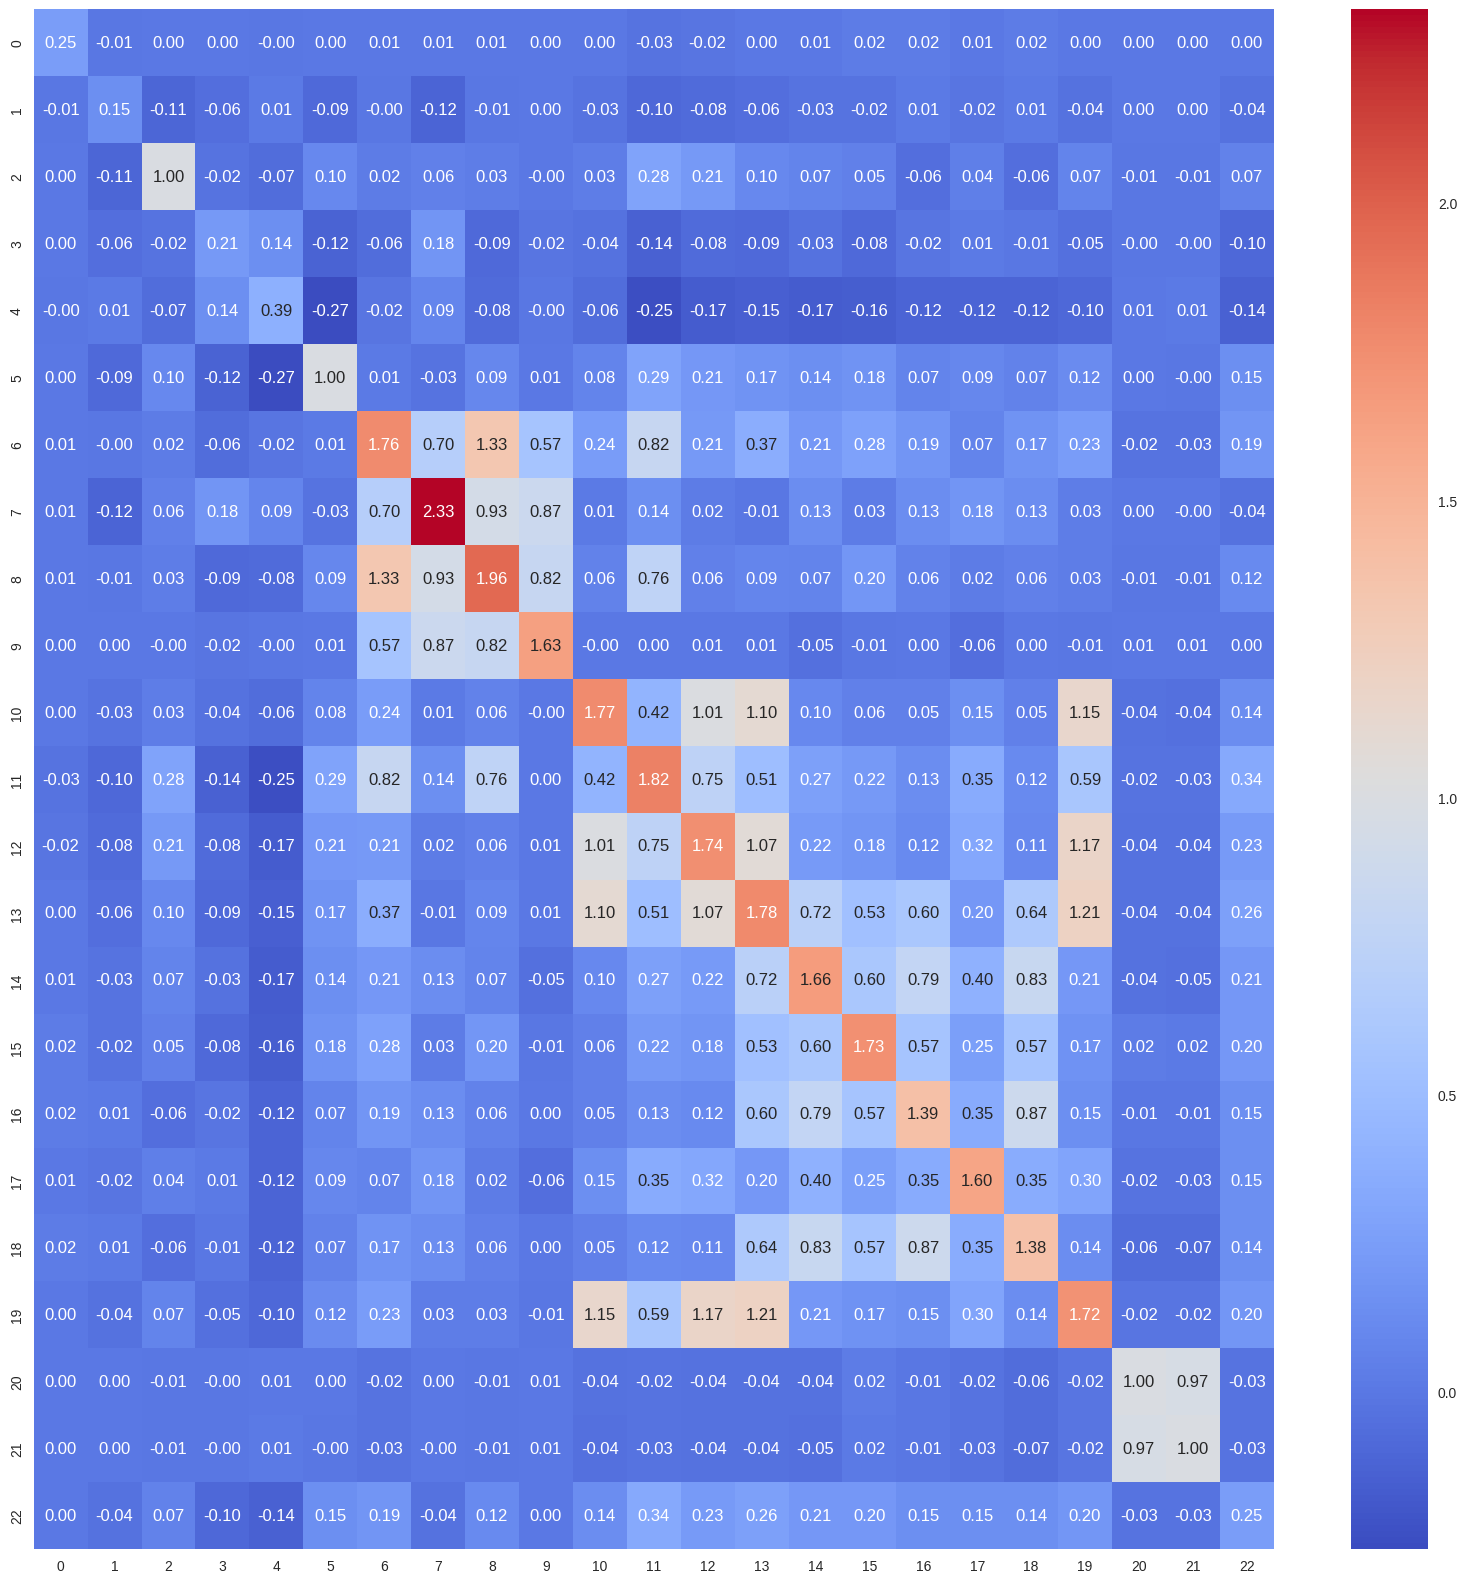

In [73]:

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cov_mat, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In [74]:
Y = train_data['satisfaction'].astype(int)
X = train_data.drop(['satisfaction'],axis = 'columns')
user_input =0.3
X_train,X_test,y_train,y_test = tts(X,Y,test_size = user_input, shuffle = True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72515, 22)
(72515,)
(31079, 22)
(31079,)


In [75]:
model = DTC()
sfs = SFS(model, k_features=10, forward=True, floating=False, scoring='accuracy',cv = 5)


In [86]:
sfs.fit(X_train, y_train)

print("Accuracy for all 10 features:", sfs.k_score_)

best_feature_indices = sfs.k_feature_idx_
print(best_feature_indices)


Accuracy for all 10 features: 0.9490036544163278
(1, 3, 4, 6, 9, 11, 12, 13, 16, 18)


In [87]:
best_feature_indices = list(best_feature_indices)

best_feature_names = train_data.columns[best_feature_indices]

print("Names of the 10 best features selected by SFS:", best_feature_names)


Names of the 10 best features selected by SFS: Index(['Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Gate location', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Baggage handling', 'Inflight service'],
      dtype='object')


In [88]:
cv = KFold(n_splits=4, shuffle=True)

sfs_forward = SFS(model, k_features=10,forward=True,floating=False,scoring='accuracy',cv=cv)
sbs_backward = SFS(model,k_features=10,forward=False, floating=False, scoring='accuracy',cv=cv)
sffs_forward_floating = SFS(model,k_features=10,forward=True,floating=True,scoring='accuracy',cv=cv)
sbfs_backward_floating = SFS(model,k_features=10,forward=False,floating=True,scoring='accuracy',cv=cv)

for sfs in [sfs_forward, sbs_backward, sffs_forward_floating, sbfs_backward_floating]:
    sfs.fit(X_train, y_train)
    print(f"SFS configuration: forward={sfs.forward}, floating={sfs.floating}, "
          f"mean cv score: {sfs.k_score_:.4f}")

SFS configuration: forward=True, floating=False, mean cv score: 0.9492
SFS configuration: forward=False, floating=False, mean cv score: 0.9486
SFS configuration: forward=True, floating=True, mean cv score: 0.9491
SFS configuration: forward=False, floating=True, mean cv score: 0.9503


SFS configuration: forward=True, floating=False
                            feature_idx  \
1                                 (11,)   
2                               (3, 11)   
3                            (3, 6, 11)   
4                         (3, 6, 9, 11)   
5                     (3, 6, 9, 11, 16)   
6                  (1, 3, 6, 9, 11, 16)   
7               (1, 3, 4, 6, 9, 11, 16)   
8           (1, 3, 4, 6, 9, 11, 16, 18)   
9       (1, 3, 4, 6, 9, 11, 12, 16, 18)   
10  (1, 3, 4, 6, 9, 11, 12, 13, 16, 18)   

                                            cv_scores avg_score  \
1   [0.7940868222185449, 0.7874675933587071, 0.789...  0.789768   
2   [0.8473164542997408, 0.8489712615147003, 0.853...    0.8497   
3   [0.8929891334326218, 0.8899001599646974, 0.889...  0.891319   
4   [0.9227205030613933, 0.9232169452258812, 0.920...  0.921768   
5   [0.9288432897567434, 0.9273539632632798, 0.929...  0.928691   
6   [0.9400959788184676, 0.9397650173754758, 0.942...  0.940523   
7   [0.94

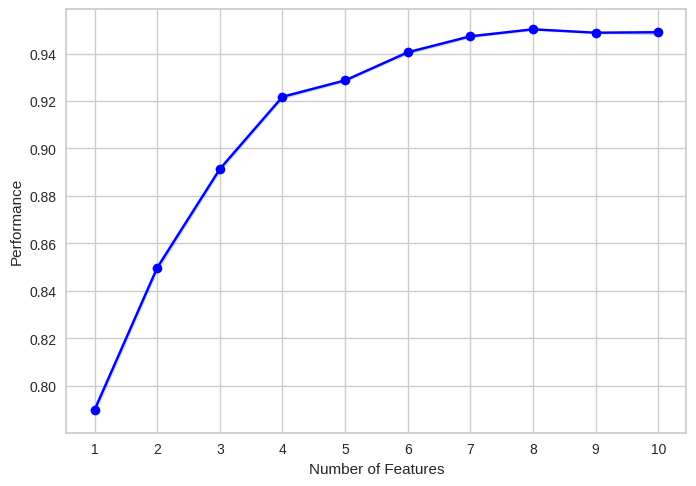

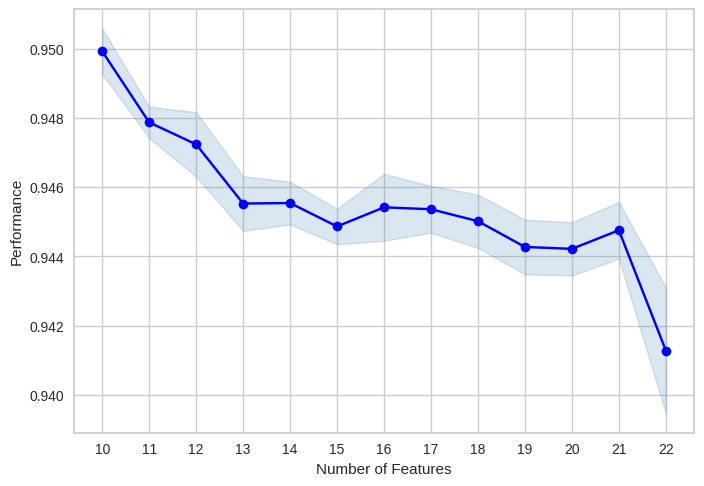

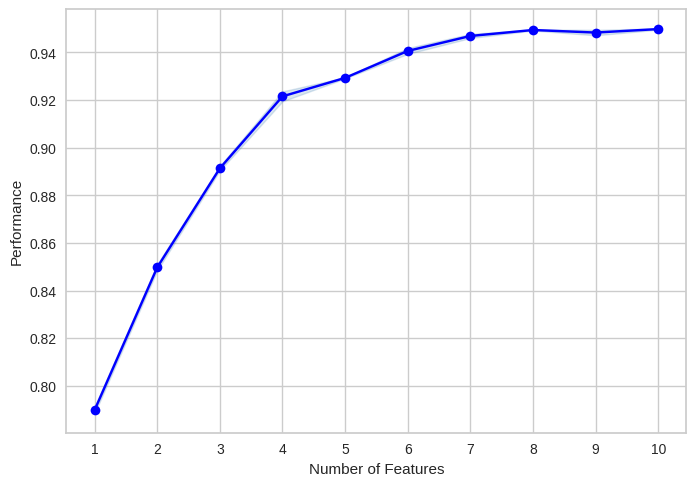

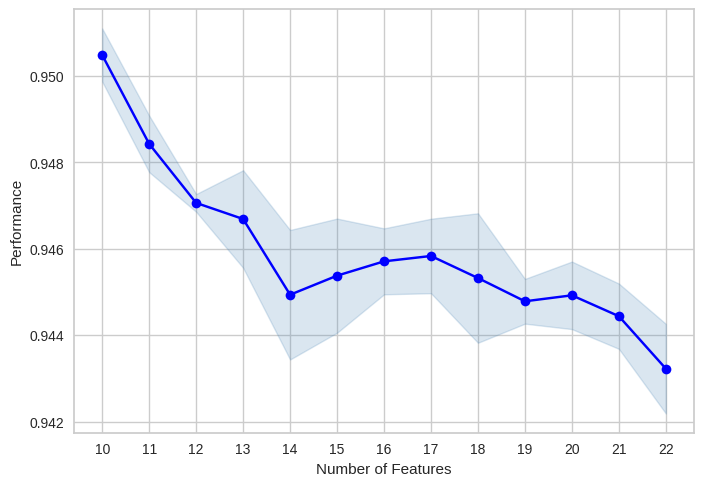

In [90]:
cv = KFold(n_splits=4, shuffle=True)

sfs_forward = SFS(model, k_features=10,forward=True,floating=False,scoring='accuracy',cv=cv)
sbs_backward = SFS(model,k_features=10,forward=False, floating=False, scoring='accuracy',cv=cv)
sffs_forward_floating = SFS(model,k_features=10,forward=True,floating=True,scoring='accuracy',cv=cv)
sbfs_backward_floating = SFS(model,k_features=10,forward=False,floating=True,scoring='accuracy',cv=cv)

for sfs in [sfs_forward, sbs_backward, sffs_forward_floating, sbfs_backward_floating]:
    sfs.fit(X_train, y_train)
    print(f"SFS configuration: forward={sfs.forward}, floating={sfs.floating}")
    print(pd.DataFrame.from_dict(sfs.get_metric_dict()).T)
    plot_sfs(sfs.get_metric_dict(), kind='std_err')

In [92]:
def bdfs(features, similarity_measures, stopping_criterion):

    selected_features = []

    best_subset = []
    best_score = 0
  
    iterations = 0
    
    while iterations < stopping_criterion:
        best_new_feature = None
        best_new_score = 0
        for feature in features:
            if feature not in selected_features:
                new_score = 0
                for selected_feature in selected_features:
                    new_score += similarity_measures[(feature, selected_feature)]
                if new_score > best_new_score:
                    best_new_feature = feature
                    best_new_score = new_score
        selected_features.append(best_new_feature)
        
        while len(selected_features) > 1:
            best_old_feature = None
            best_old_score = best_new_score
            for feature in selected_features:
                old_score = 0
                for selected_feature in selected_features:
                    if selected_feature != feature:
                        old_score += similarity_measures[(selected_feature, feature)]
                if old_score > best_old_score:
                    best_old_feature = feature
                    best_old_score = old_score
            selected_features.remove(best_old_feature)
            if best_new_score > best_score:
                best_subset = selected_features.copy()
                best_score = best_new_score
        iterations += 1

    return best_subset


In [102]:
from sklearn.feature_selection import mutual_info_classif, f_classif
from scipy.spatial.distance import cosine, euclidean, cityblock
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def get_similarity_measure(features, similarity_measure):

    if similarity_measure == 'accuracy':

        dt = DTC()
        svm = SVC(kernel='linear')

        accuracy_dt = {feature: accuracy_score(y_train, dt.fit(X_train[[feature]], y_train).predict(X_train[[feature]])) for feature in features}
        accuracy_svm = {feature: accuracy_score(y_train, svm.fit(X_train[[feature]], y_train).predict(X_train[[feature]])) for feature in features}

        similarity_measures = {(feature1, feature2): abs(accuracy_dt[feature1]-accuracy_dt[feature2]) + abs(accuracy_svm[feature1]-accuracy_svm[feature2]) for i, feature1 in enumerate(features) for feature2 in features[i+1:]}
    elif similarity_measure == 'information':

        info_gain = dict(zip(features, mutual_info_classif(X_train, y_train)))

        similarity_measures = {(feature1, feature2): abs(info_gain[feature1]-info_gain[feature2]) for i, feature1 in enumerate(features) for feature2 in features[i+1:]}
    elif similarity_measure == 'distance':

        distances = {(feature1, feature2): cosine(X_train[feature1], X_train[feature2]) for i, feature1 in enumerate(features) for feature2 in features[i+1:]}

        similarity_measures = {(feature1, feature2): -distances[(feature1, feature2)] for feature1, feature2 in distances}
    elif similarity_measure == 'separability':

        lda = LinearDiscriminantAnalysis()

        class_conditional_densities = {feature: lda.fit(X_train[[feature]], y_train).transform(X[[feature]]) for feature in features}

        similarity_measures = {(feature1, feature2): -euclidean(class_conditional_densities[feature1], class_conditional_densities[feature2]) for i, feature1 in enumerate(features) for feature2 in features[i+1:]}
    
    return similarity_measures

In [103]:
def BDFS(features, similarity_measure):

    similarity_measures = get_similarity_measure(features, similarity_measure)
    

    forward_set = set()
    backward_set = set(features)

    best_feature_set = set()
    best_similarity_measure = float('-inf')
    
    while forward_set.intersection(backward_set) == set():
        max_similarity_measure = float('-inf')
        max_similarity_measure_feature = None
        for feature1 in forward_set:
            for feature2 in backward_set:
                if similarity_measures[(feature1, feature2)] > max_similarity_measure:
                    max_similarity_measure = similarity_measures[(feature1, feature2)]
                    max_similarity_measure_feature = feature1
        forward_set.add(max_similarity_measure_feature)
        forward_similarity_measures = {feature: sum([similarity_measures[(feature, f)] for f in forward_set]) for feature in backward_set}
        max_forward_similarity_measure = float('-inf')
        max_forward_similarity_measure_feature = None
        for feature in backward_set:
            if forward_similarity_measures[feature] > max_forward_similarity_measure:
                max_forward_similarity_measure = forward_similarity_measures[feature]
                max_forward_similarity_measure_feature = feature
        backward_set.remove(max_forward_similarity_measure_feature)
        if max_similarity_measure > best_similarity_measure:
            best_feature_set = forward_set.copy()
            best_similarity_measure = max_similarity_measure
    
    return list(best_feature_set)


In [ ]:
features = X_train.columns
similarity_measure = 'accuracy'
selected_features = BDFS(features, similarity_measure)
print(selected_features)


# Question 2

In [3]:
import numpy as np

cov = np.array([[0.6006771, 0.14889879 ,0.244939], [0.14889879, 0.58982531,0.24154981], [0.244939,0.24154981,0.48778655]])

data = np.random.multivariate_normal(mean=[0, 0, 0], cov=cov, size=1000)

In [4]:
data.shape

(1000, 3)

In [5]:
v = [1/math.sqrt(6),1/math.sqrt(6),-2/math.sqrt(6)]
v = np.array(v)
v.reshape(3,1)

array([[ 0.40824829],
       [ 0.40824829],
       [-0.81649658]])

In [6]:
classes = np.zeros((1000,),dtype = int)
for i in range(len(data)):
  datapoint = data[i,:]
  dot = np.dot(datapoint,v)
  if dot <= 0:
    classes[i] = 1
print(classes.shape)
classes

(1000,)


array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [7]:
x = data[:,0]
y = data[:,1]
z = data[:,2]

colors = ['red', 'green']


fig = pg.Figure(data=[pg.Scatter3d(x=x, y=y, z=z, mode='markers',marker=dict(color=[colors[c] for c in classes],size = 5))])


fig.update_layout(scene=dict(xaxis_title='x axis', yaxis_title='y axis', zaxis_title='z axis'),title='3D Scatter Plot of Dataset')


fig.show()

In [8]:
pca = PCA(n_components=3)
X_trans =  pca.fit_transform(data)
X_trans

array([[ 0.63374196,  1.20265287, -0.39856537],
       [ 0.57042239,  1.27195442,  0.965168  ],
       [-0.65711596,  0.24072732,  0.87427355],
       ...,
       [-0.70840166,  0.76801258, -0.27005236],
       [ 0.5224858 ,  0.6729651 ,  0.85303079],
       [-0.01118527, -0.55130423, -0.0626253 ]])

In [9]:
data

array([[ 1.40343452, -0.33090721,  0.06169104],
       [ 0.87193738, -0.98677051,  1.13683517],
       [-0.53694965, -0.92441568,  0.36892194],
       ...,
       [ 0.26337438, -0.8466129 , -0.60245335],
       [ 0.46408982, -0.54496457,  1.02670451],
       [-0.34919471,  0.39590728, -0.01030789]])

In [10]:
x1 = X_trans[:,:2]
x2 = X_trans[:,1:]
x3 = np.delete(X_trans, 1, axis=1)

datasets = [x1,x2,x3]

0.492
0.992
0.992


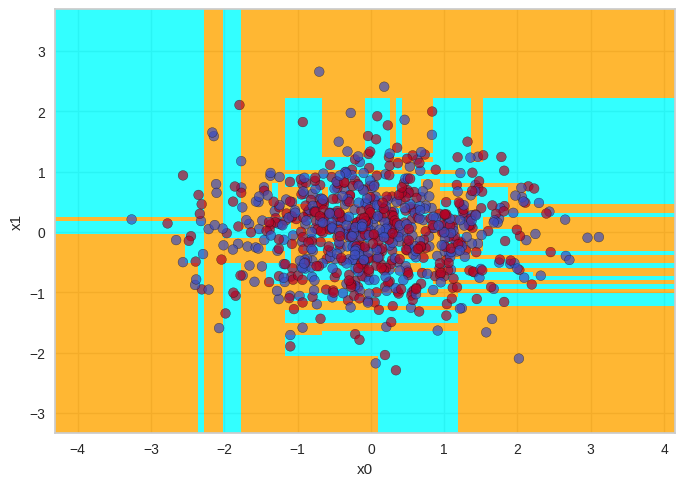

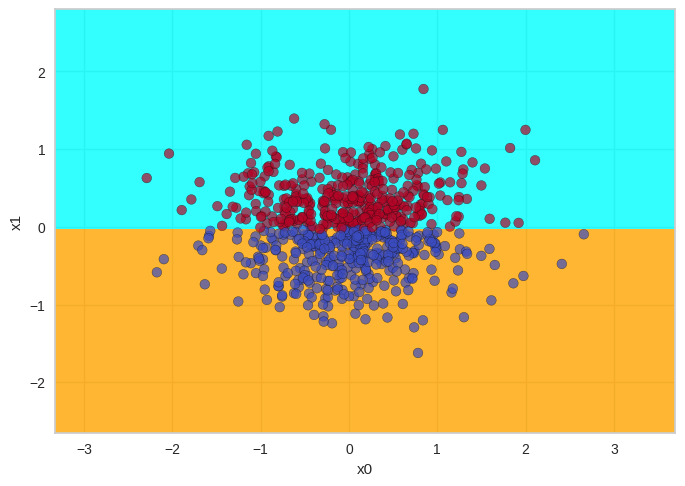

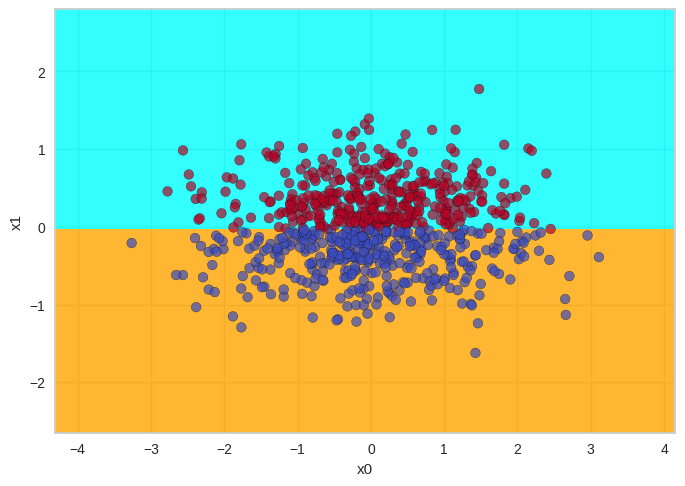

In [11]:
for some in datasets:
  user_prompt = 0.25
  user_enable = False
  x_train,x_test,y_train,y_test = tts(some,classes,test_size=user_prompt,shuffle=user_enable)
  model = DTC()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print(acc)
  cmap_light = ListedColormap(["orange", "cyan"])
  disp = DecisionBoundaryDisplay.from_estimator(model, x_train,cmap = cmap_light, response_method="predict",xlabel='x0',alpha = 0.8, ylabel='x1',plot_method = 'pcolormesh',grid_resolution = 100)
  disp.ax_.scatter(x_train[:, 0], x_train[:, 1],cmap = 'coolwarm', c=y_train,edgecolor="k",alpha = 0.7)

0.524


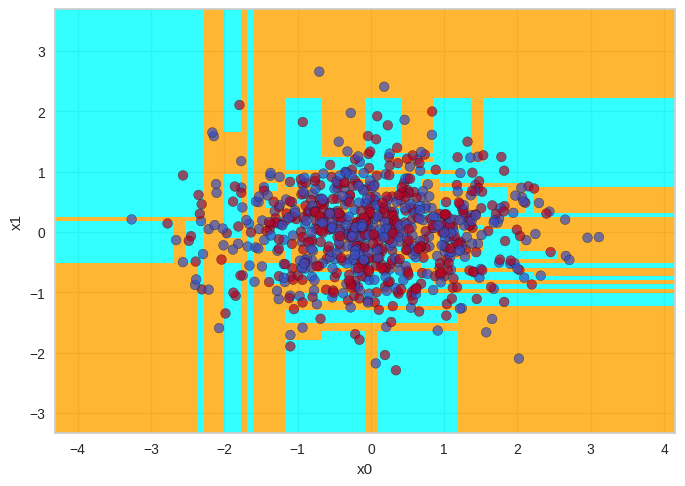

In [12]:
pca = PCA(n_components=2)
X_trans2 =  pca.fit_transform(data)
X_trans2
user_prompt = 0.25
user_enable = False
x_train,x_test,y_train,y_test = tts(X_trans2,classes,test_size=user_prompt,shuffle=user_enable)
model = DTC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
cmap_light = ListedColormap(["orange", "cyan"])
disp = DecisionBoundaryDisplay.from_estimator(model, x_train,cmap = cmap_light, response_method="predict",xlabel='x0',alpha = 0.8, ylabel='x1',plot_method = 'pcolormesh',grid_resolution = 100)
disp.ax_.scatter(x_train[:, 0], x_train[:, 1],cmap = 'coolwarm', c=y_train,edgecolor="k",alpha = 0.7)

The vector v that we have selected is a unit vector which divides our dataset along its normal plane. Since the variances of the x axis column and the y axis column is more than the z axis column , when we put n_component = 2 in PCA we see that it transforms the feature to be as same as the x-y axes dataset. We see that the decison boundary and the accuracy for the above stated 2 cases is very similar. Now the vector v that we have selected for applying cllasification is of the nature where when we take it along the X - Z axes or the Y- Z axes we get a very high value of accuracy as compared to PCA(n_components =2) or the X-Y axes beacuse of the value of its z component being higher than its x and y components. We can see this when we see along the X axis and along the Y axis in our 3 dimensional scatter plot. We can see that the imaginary plane dividing the 2 classes is very much visible wheb=n we see along the above 2 axes however when we see along the z axis we see that the distribution of these points becomes some sort of random distribution, thus we see that the accuracy for this case is about 50% as compared to more than 95% for the other 2 cases.